In [19]:
print("Pre-Processing Techniques using Scikit: \n ML Algorithms/Models ONLY understands numbers, \n therefore there will be need to convert eg text to vectors of numbers ")

Pre-Processing Techniques using Scikit: 
 ML Algorithms/Models ONLY understands numbers, 
 therefore there will be need to convert eg text to vectors of numbers 


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

### 1. StandardScaler
- The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of
- Calculate - Subtract mean of column & div by standard deviation
- If data is not normally distributed, this is not the best scaler to use.


In [27]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

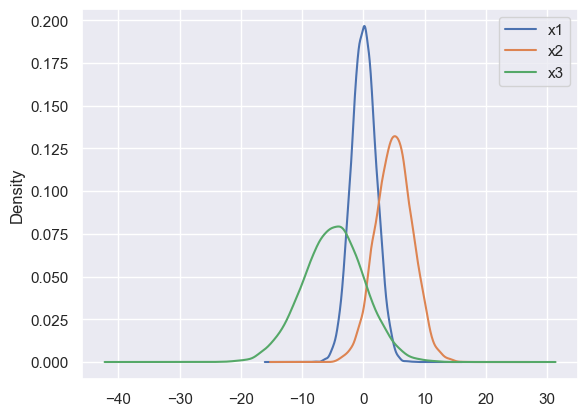

In [28]:
# plotting data - although in different scale

df.plot.kde()
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

#Plots data of different scale to same scale data 

In [30]:
data_tf = standardscaler.fit_transform(df)

In [31]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

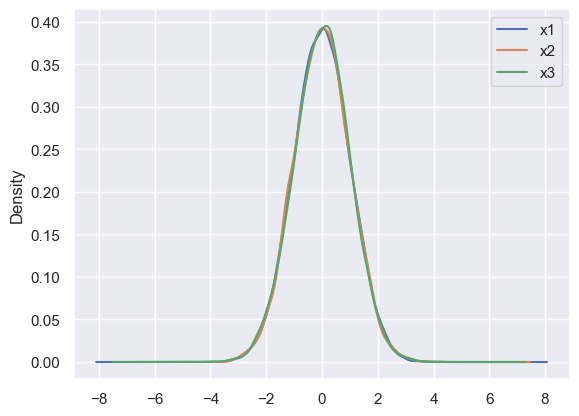

In [32]:
df.plot.kde()
plt.show()

#StandardScaler now Plots data in same scale

### 2. 3. MinMaxScaler
- One of the most popular
- Calculate - Subtract min of column & div by difference between max & min
- Data shifts between 0 & 1
- If distribution not suitable for StandardScaler, this scaler works out.
Sensitive to outliers

In [36]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

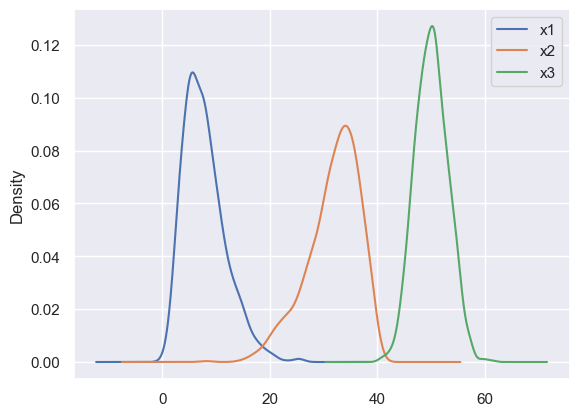

In [38]:
df.plot.kde()
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

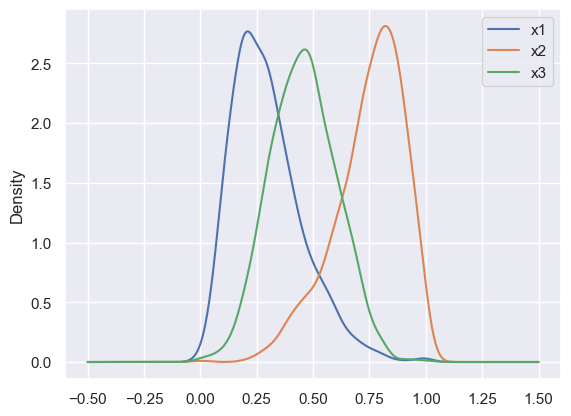

In [44]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()
plt.show()

#MinMaxScaler now Plots data in same scale

### 3. Robust Scaler
- Suited for data with outliers
- Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile

In [45]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

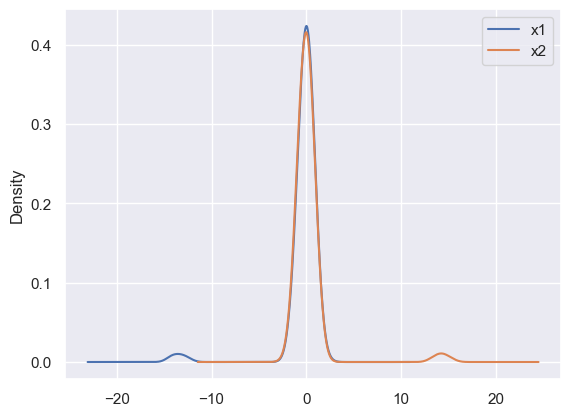

In [51]:
df.plot.kde()
plt.show()

In [52]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [53]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

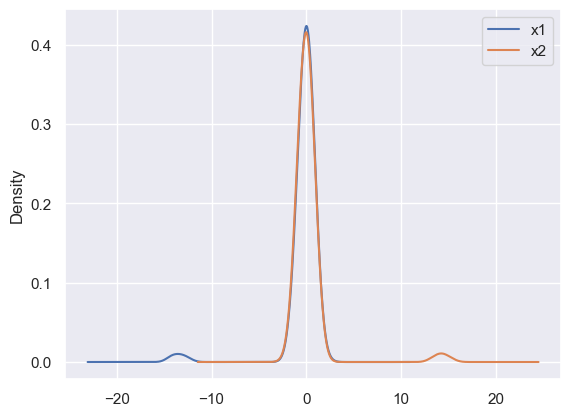

In [55]:
df.plot.kde()
plt.show()

#same scale by robustscaler

### 4. Normalizer
- Each parameter value is obtained by dividing by magnitude
* Centralizes data to origin

In [56]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

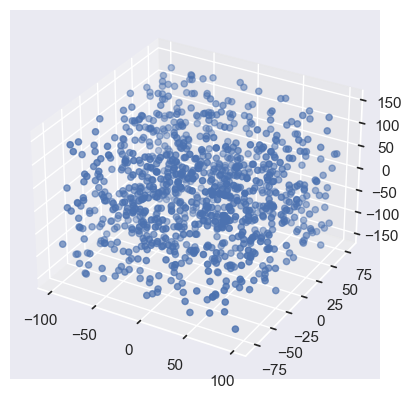

In [62]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

plt.show()

In [64]:
from sklearn.preprocessing import Normalizer

In [65]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [66]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

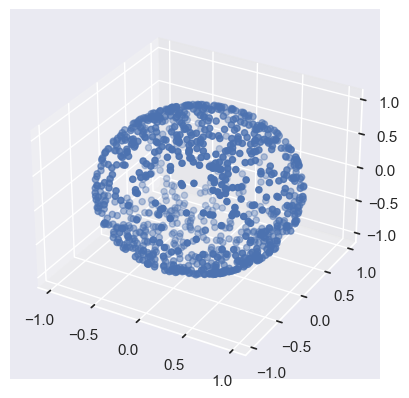

In [69]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)
plt.show()

#cetralize data to a unique distance from the origin

### 5. Binarization
- Thresholding numerical values to binary values ( 0 or 1 )
- A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [70]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [71]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [72]:
data_tf = binarizer.fit_transform(X)

In [74]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

### 6. Encoding Categorical Values
#### Encoding Ordinal Values
- Ordinal Values - Low, Medium & High. Relationship between values
- LabelEncoding with right mapping

In [75]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [76]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [77]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### Encoding Nominal Values
- Nominal Values - Male, Female. No relationship between data
- One Hot Encoding for converting data into one-hot vector

In [78]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [79]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [82]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)


In [83]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [84]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

### 7. Imputation
- Missing values cannot be processed by learning algorithms
- Imputers can be used to infer value of missing data from existing data

In [85]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [90]:
#from sklearn.preprocessing import Imputer
#imputer = SimpleImputer(strategy='mean', axis = 1)
#The Imputer class from sklearn.preprocessing has been deprecated and removed in Scikit-learn version 0.22. Instead, you should use the SimpleImputer class from sklearn.impute

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [91]:
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

### 8. Polynomial Features
- Deriving non-linear feature by coverting data into higher degree
- Used with linear regression to learn model of higher degree

In [92]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [93]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [94]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

### 9.  Custom Transformer
- Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
- FunctionTransformer is used to create one Transformer
- validate = False, is required for string columns

In [95]:
from sklearn.preprocessing import FunctionTransformer

In [96]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [97]:
customtransformer = FunctionTransformer(mapping, validate=False)


In [98]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [99]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## Text Processing
- Perhaps one of the most common information
- Learning algorithms don't understand text but only numbers
- Below menthods convert text to numbers

### 1. CountVectorizer
- Each column represents one word, count refers to frequency of the word
- Sequence of words are not maintained
* ### Hyperparameters
- n_grams - Number of words considered for each column
- stop_words - words not considered
- vocabulary - only words considered

In [100]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [102]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# CountVectorizer finds the frequency of each word then creates a vocubulary(unique word) 
#then assigns one column for each word

In [103]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [106]:
#creates a vocubulary(unique word) then assigns one column for each word
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [107]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [108]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [109]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]], dtype=int64)

In [119]:
#cv = CountVectorizer(ngram_range=[1,2]) #wrong use () for a tuple not [] for list
cv = CountVectorizer(ngram_range= (1,2))
cv.fit_transform(df.Text).toarray()

#n-gram depicts or acknowledges two words in a statement, 'not good(-ve),' & 'good(+ve)' 
#are two statement with same word good
#but different meaning, so to recognize that, n-gram concept comes into play

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [116]:
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

### 2. TfIdfVectorizer
- Words occuring more frequently in a doc versus entire corpus is considered more important
- The importance is in scale of 0 & 1

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [121]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [123]:
#vectorizer.get_feature_names() #wrong
#The TfidfVectorizer in Scikit-learn no longer has the get_feature_names method as of version 1.0. Instead, 
#you should use the get_feature_names_out method to retrieve the feature names.

vectorizer.get_feature_names_out()

array(['awesome', 'document', 'food', 'impossible', 'mission', 'second'],
      dtype=object)

### 3.  HashingVectorizer
- All above techniques converts data into table where each word is converted to column
- Learning on data with lakhs of columns is difficult to process
- HashingVectorizer is an useful technique for out-of-core learning
- Multiple words are hashed to limited column
- Limitation - Hashed value to word mapping is not possible

In [125]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [126]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## Image Processing using skimage
- skimage doesn't come with anaconda. install with 'pip install skimage'
- Images should be converted from 0-255 scale to 0-1 scale.
- skimage takes image path & returns numpy array
- images consist of 3 dimension

In [127]:
from skimage.io import imread,imshow

In [133]:
image = imread('C:/your_path/f.JPEG')

In [134]:
image.shape

(183, 196, 3)

In [135]:
image[0]

array([[ 85,  84,  82],
       [ 85,  84,  82],
       [ 86,  85,  83],
       [ 87,  86,  84],
       [ 88,  87,  85],
       [ 90,  86,  85],
       [ 91,  87,  86],
       [ 91,  87,  86],
       [ 94,  88,  88],
       [ 94,  88,  88],
       [ 94,  88,  88],
       [ 96,  87,  88],
       [ 96,  87,  88],
       [ 96,  87,  88],
       [ 96,  87,  88],
       [ 96,  87,  88],
       [ 94,  88,  88],
       [ 94,  88,  88],
       [ 95,  89,  89],
       [ 95,  89,  89],
       [ 96,  90,  90],
       [ 97,  91,  91],
       [ 97,  91,  91],
       [ 98,  92,  92],
       [ 98,  92,  92],
       [ 98,  92,  92],
       [ 99,  93,  93],
       [ 99,  93,  93],
       [ 99,  93,  93],
       [100,  94,  94],
       [100,  94,  94],
       [100,  94,  94],
       [100,  96,  95],
       [100,  96,  95],
       [100,  96,  95],
       [100,  96,  95],
       [100,  96,  95],
       [100,  96,  93],
       [100,  96,  93],
       [100,  96,  93],
       [103, 100,  95],
       [103, 100

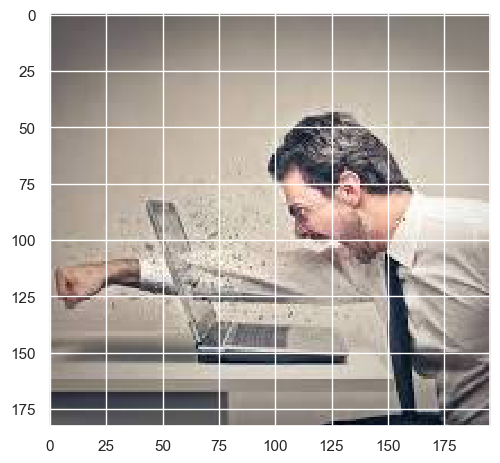

In [137]:
imshow(image)
plt.show()

In [138]:
from skimage.color import rgb2gray

In [139]:
rgb2gray(image).shape

(183, 196)

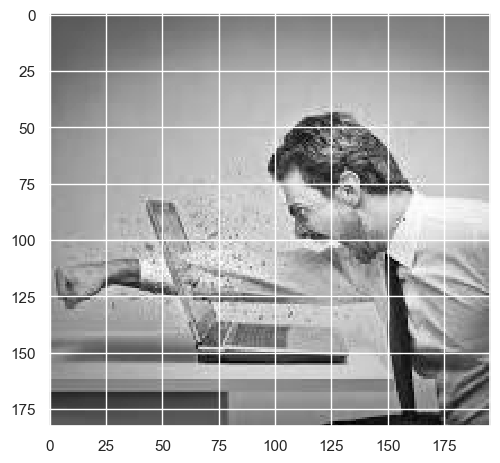

In [143]:
imshow(rgb2gray(image)) #black and white
plt.show()

In [144]:
from skimage.transform import resize

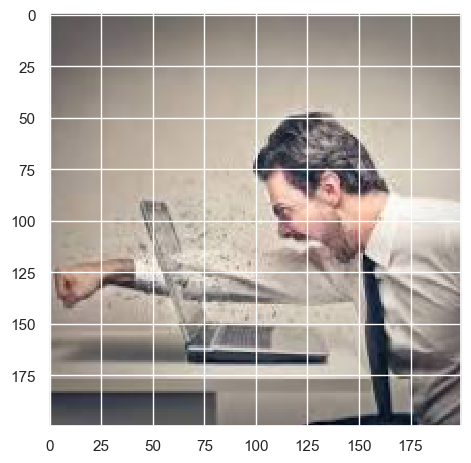

In [146]:
#resiize your image to your preference
imshow(resize(image, (200,200)))

plt.show()